In [1]:
%matplotlib inline

In [2]:
from IPython.display import Math

In [3]:
from functools import partial 
from matplotlib import pyplot as pl
import numpy as np
import scipy.optimize
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


Hacemos una enzima hipotética con KM=100 uM, Vmax = 10 uM/s

In [4]:
Km=100
Vmax=10

Ponemos una concentración inicial de 500uM (S0>>Km)

In [5]:
S0=500

La ecuación integrada es implícita en p(t)

In [47]:
Math(r'V_{max}t=p+K_M \ln \bigg[ \frac{S_0}{(S_0-p)} \bigg] ')

<IPython.core.display.Math object>

In [7]:
def z(t, p):
    return Km*np.log(S0/(S0-p))+p-Vmax*t

Para resolver la ecuación intrgrada definimos un rango. El rango de productos debe ser [0,S0)

In [8]:
t_window = 0, 200
p_window = 0, S0-1e-10

Resuelvo la ecuación implícita, buscando para cada valor de t los valores de p que hacen que la ecuación definida sea 0

In [9]:
ts = []
ps = []
for t in np.linspace(*t_window, num=500):
    try:
        # A more efficient technique would use the last-found-y-value as a 
        # starting point
        p = scipy.optimize.brentq(partial(z, t), *p_window)
    except ValueError:
        # Should we not be able to find a solution in this window.
        pass
    else:
        ts.append(t)
        ps.append(p)

Convierto las listas en arrays de numpy y dibujo todo y 1 de cada 20 puntos

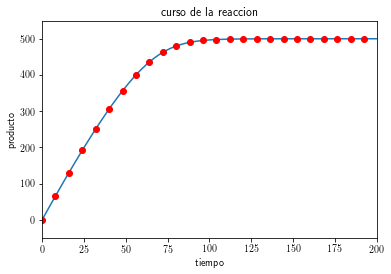

In [10]:
ts=np.array(ts)
ps=np.array(ps)
pl.plot(ts, ps)
pl.plot(ts[::20],ps[::20],'ro')
pl.xlim(*t_window)
pl.ylim([-50,550])
pl.xlabel("tiempo")
pl.ylabel("producto")
pl.title("curso de la reaccion")
pl.savefig("timeCourseP.pdf", bbox_inches="tight")

Calculo la concentración de sustrato vs tiempo

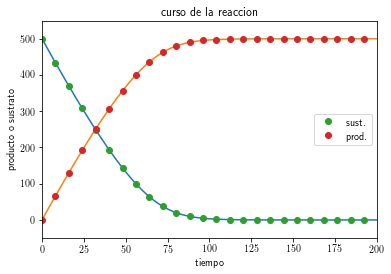

In [11]:
ts=np.array(ts)
ps=np.array(ps)
ss=S0-ps
pl.plot(ts,ss)
pl.plot(ts,ps)
pl.plot(ts[::20],ss[::20],'o',label="sust.")
pl.plot(ts[::20],ps[::20],'o',label="prod.")
pl.xlim(*t_window)
pl.ylim([-50,550])
pl.legend(loc=0)
pl.xlabel("tiempo")
pl.ylabel("producto o sustrato")
pl.title("curso de la reaccion")
pl.savefig("timeCourseSP.pdf", bbox_inches="tight")

En un experimento real voy a conocer:
- S0
- p(t)

Puedo linealizar similar a lo que hago con M&M, dividiendo los términos de la ecuación por

V*ln(S0/(S0-P))

Excluyo el punto ps==0 (el log me da 0!)

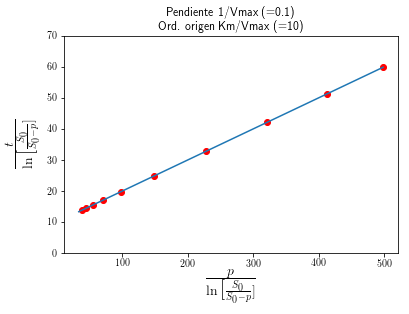

In [16]:
y=ts[1:]/np.log(S0/(S0-ps[1:]))
x=ps[1:]/np.log(S0/(S0-ps[1:]))
pl.plot(x[::50],y[::50],'ro')
pl.plot(x,y)
pl.ylabel(r"$\frac{t}{\ln \big[ \frac{S_0}{S_0-p}]}", fontsize=20)
pl.xlabel(r"$\frac{p}{\ln \big[ \frac{S_0}{S_0-p}]}", fontsize=20)
pl.title("Pendiente 1/Vmax (=0.1)\nOrd. origen Km/Vmax (=10)")
pl.ylim([0,70])
pl.savefig("linearTimeCourseSP.pdf", bbox_inches="tight")

OK, so far so good... pero qué mido en realidad?

Mido, say, absorbancia:

abs=m*S+n*P

Donde m es la absorptividad del sustrato y n es la absorptividad del producto a la long de onda medida

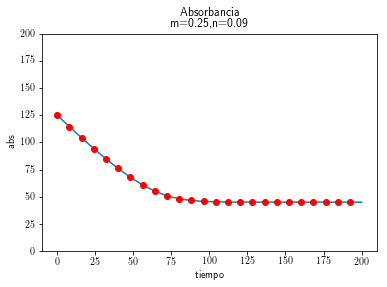

In [17]:
m=0.25
n=0.09
A=m*ss+n*ps
pl.plot(ts,A)
pl.plot(ts[::20],A[::20],'ro')
pl.ylim([0,200])
pl.xlabel("tiempo")
pl.ylabel("abs")
pl.title("Absorbancia\nm=0.25,n=0.09")
pl.savefig("AbsTimeCourse.pdf", bbox_inches="tight")

puedo linealizar de nuevo

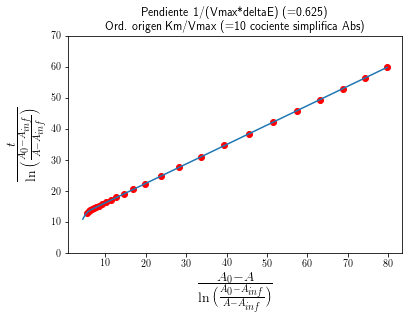

In [18]:
A0=A[0]
Ainf=A[len(A)-1]
y=ts[1:-1]/np.log((A0-Ainf)/(A[1:-1]-Ainf))
x=(A0-A[1:-1])/np.log((A0-Ainf)/(A[1:-1]-Ainf))
pl.plot(x[::20],y[::20],'ro')
pl.plot(x,y)
pl.ylabel(r"$\frac{t}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.xlabel(r"$\frac{A_0-A}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.title("Pendiente 1/(Vmax*deltaE) (=0.625)\nOrd. origen Km/Vmax (=10 cociente simplifica Abs)")
pl.ylim([0,70])
pl.savefig("LinAbsTimeCourse.pdf", bbox_inches="tight")

Hay un problemita sobre el final... a que se debe?

Igual, las medidas tienen ruido!!

In [19]:
ruido=np.random.normal(0,1,len(ts))
Areal=A+ruido

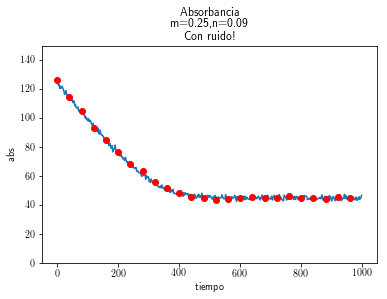

In [43]:
# pl.plot(ts,A,"k-",linewidth=2)
pl.plot(ts,Areal)#,alpha=0.5)
pl.plot(ts[::20],Areal[::20],'ro')
pl.ylim([0,200])
pl.xlabel("tiempo")
pl.ylabel("abs")
pl.ylim([0,150])
pl.title("Absorbancia\nm=0.25,n=0.09\nCon ruido!")
pl.savefig("AbsRuido.pdf", bbox_inches="tight")

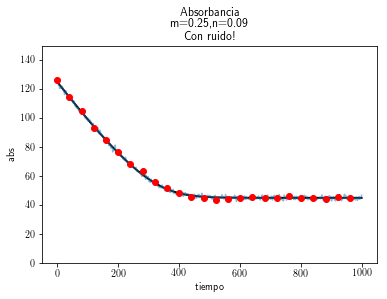

In [44]:
pl.plot(ts,A,"k-",linewidth=2)
pl.plot(ts,Areal,alpha=0.5)
pl.plot(ts[::20],Areal[::20],'ro')
pl.ylim([0,200])
pl.xlabel("tiempo")
pl.ylabel("abs")
pl.ylim([0,150])
pl.title("Absorbancia\nm=0.25,n=0.09\nCon ruido!")
pl.savefig("AbsRuidoFit.pdf", bbox_inches="tight")

Si tomo Ainf como el ultimo valor estoy complicado ... por qué?

Pongamos que tomo min(abs) como Ainf. Que pasa si linealizo a Ainf?

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


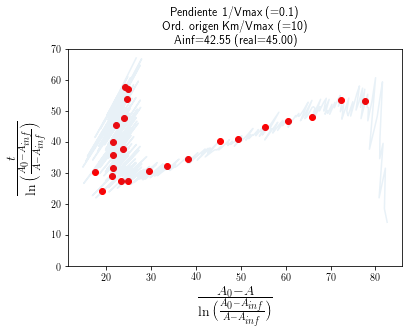

In [22]:
A0=Areal[0]
Ainf=min(Areal)
usables=[a for a in zip(ts,Areal) if a[1]>Ainf]
tsusables=np.array([a[0] for a in usables])
Ausables=np.array([a[1] for a in usables])
y=tsusables/np.log((A0-Ainf)/(Ausables-Ainf))
x=(A0-Ausables)/np.log((A0-Ainf)/(Ausables-Ainf))
pl.plot(x[::20],y[::20],'ro')
pl.plot(x,y, alpha=0.1)
pl.ylabel(r"$\frac{t}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.xlabel(r"$\frac{A_0-A}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.title("Pendiente 1/Vmax (=0.1)\nOrd. origen Km/Vmax (=10)\nAinf=%5.2f (real=%5.2f)"%(Ainf,S0*(n)))
pl.ylim([0,70])
pl.savefig("AbsRuidoLin.pdf", bbox_inches="tight")

Que pasa si uso el valor real de Ainf?

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


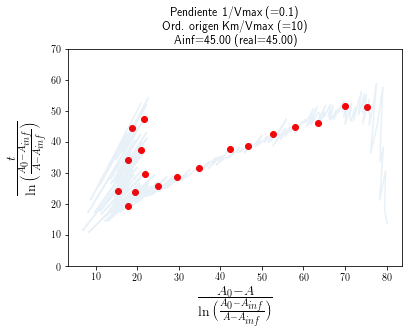

In [23]:
A0=Areal[0]
Ainf=S0*(n)
usables=[a for a in zip(ts,Areal) if a[1]>Ainf]
tsusables=np.array([a[0] for a in usables])
Ausables=np.array([a[1] for a in usables])
y=tsusables/np.log((A0-Ainf)/(Ausables-Ainf))
x=(A0-Ausables)/np.log((A0-Ainf)/(Ausables-Ainf))
pl.plot(x[::20],y[::20],'ro')
pl.plot(x,y, alpha=0.1)
pl.ylabel(r"$\frac{t}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.xlabel(r"$\frac{A_0-A}{\ln \big( \frac{A_0-A_{inf}}{A-A_{inf}} \big)}", fontsize=20)
pl.title("Pendiente 1/Vmax (=0.1)\nOrd. origen Km/Vmax (=10)\nAinf=%5.2f (real=%5.2f)"%(Ainf,S0*(n)))
pl.ylim([0,70])
pl.savefig("AbsRuidoLinRealAi.pdf", bbox_inches="tight")

Al tener incierto el valor de Ainf se complica la estimación de KM/Vmax. O de Vmax/KM, que vendria a ser lo mismo. Por que?

Situaciones extremas. Empecemos con S0>>KM

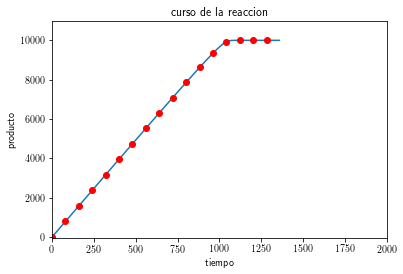

In [24]:
S0=10000
t_window = 0, 2000
p_window = 0, S0-1e-12
ts = []
ps = []
for t in np.linspace(*t_window, num=500):
    try:
        # A more efficient technique would use the last-found-y-value as a 
        # starting point
        p = scipy.optimize.brentq(partial(z, t), *p_window)
    except ValueError:
        # Should we not be able to find a solution in this window.
        pass
    else:
        ts.append(t)
        ps.append(p)
ts=np.array(ts)
ps=np.array(ps)
pl.plot(ts, ps)
pl.plot(ts[::20],ps[::20],'ro')
pl.xlim(*t_window)
pl.ylim([-50,11000])
pl.xlabel("tiempo")
pl.ylabel("producto")
pl.title("curso de la reaccion")
pl.savefig("S0grande.pdf", bbox_inches="tight")

La Vmax está muy bien definida, pero KM no!

Y si S0<<KM?

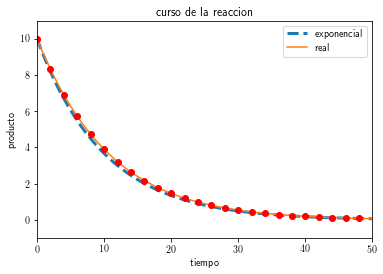

In [27]:
S0=10
t_window = 0, 50
p_window = 0, S0-1e-10
ts = []
ps = []
for t in np.linspace(*t_window, num=500):
    try:
        # A more efficient technique would use the last-found-y-value as a 
        # starting point
        p = scipy.optimize.brentq(partial(z, t), *p_window)
    except ValueError:
        # Should we not be able to find a solution in this window.
        pass
    else:
        ts.append(t)
        ps.append(p)
ts=np.array(ts)
ps=np.array(ps)
ss=S0-ps
sexp=S0*(np.exp(-Vmax*ts/Km))
pl.plot(ts,sexp,'--',linewidth=3, label="exponencial")
pl.plot(ts, ss, label="real")
pl.plot(ts[::20],ss[::20],'ro')
pl.xlim(*t_window)
pl.ylim([-1,11])
pl.xlabel("tiempo")
pl.ylabel("producto")
pl.title("curso de la reaccion")
pl.legend(loc=0)
pl.savefig("S0chico.pdf", bbox_inches="tight")

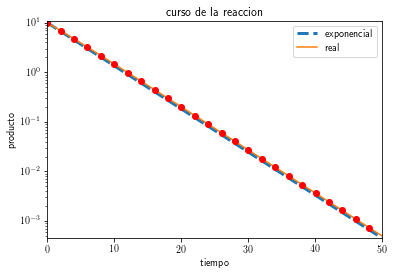

In [31]:
S0=10
t_window = 0, 50
p_window = 0, S0-1e-10
ts = []
ps = []
for t in np.linspace(*t_window, num=500):
    try:
        # A more efficient technique would use the last-found-y-value as a 
        # starting point
        p = scipy.optimize.brentq(partial(z, t), *p_window)
    except ValueError:
        # Should we not be able to find a solution in this window.
        pass
    else:
        ts.append(t)
        ps.append(p)
ts=np.array(ts)
ps=np.array(ps)
ss=S0-ps
sexp=S0*(np.exp(-Vmax*ts/Km))
pl.semilogy(ts,sexp,'--',linewidth=3, label="exponencial")
pl.semilogy(ts, ss, label="real")
pl.semilogy(ts[::20],ss[::20],'ro')
pl.xlim(*t_window)
pl.ylim([-1,11])
pl.xlabel("tiempo")
pl.ylabel("producto")
pl.title("curso de la reaccion")
pl.legend(loc=0)
pl.savefig("S0chico2.pdf", bbox_inches="tight")

Es casi exponencial!
El coeficiente del exponente es Vmax/KM

Test de Selwyn, caso ideal. Curvas para E; 2*E y 0.5*E

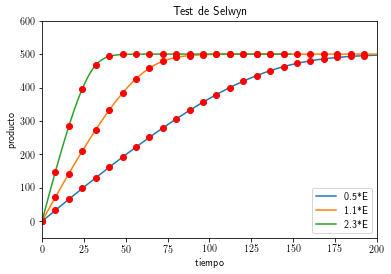

In [33]:
S0=500
t_window = 0, 200
p_window = 0, S0-1e-10
allVs=[5,11,23]
allTs=[]
allPs=[]
allSs=[]
for Vmax in allVs:
    ts = []
    ps = []
    for t in np.linspace(*t_window, num=500):
        try:
            # A more efficient technique would use the last-found-y-value as a 
            # starting point
            p = scipy.optimize.brentq(partial(z, t), *p_window)
        except ValueError:
            # Should we not be able to find a solution in this window.
            pass
        else:
            ts.append(t)
            ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    ss=S0-ps
    allTs.append(ts)
    allPs.append(ps)
    allSs.append(ss)
    pl.plot(ts, ps, label="%3.1f*E"%(Vmax/10.0))
    pl.plot(ts[::20],ps[::20],'ro')
    pl.xlim(*t_window)
    pl.ylim([-50,600])
    pl.xlabel("tiempo")
    pl.ylabel("producto")
    pl.title("Test de Selwyn")
    pl.legend(loc=0)
pl.savefig("Selwyn1.pdf", bbox_inches="tight")

Graficando E*tiempo

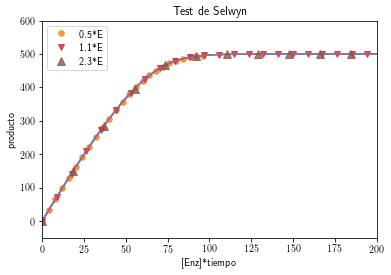

In [35]:
simbolos=['o','v','^']
for Times,Prod,Vel,simb in zip(allTs,allPs,allVs,simbolos):

    Enz=Vel/10.0
    pl.plot(Enz*Times,Prod)
    pl.plot(Enz*Times[::20],Prod[::20],simb,markersize=5+Enz,label="%3.1f*E"%Enz,alpha=0.8)

pl.xlim(*t_window)
pl.ylim([-50,600])
pl.xlabel("[Enz]*tiempo")
pl.ylabel("producto")
pl.title("Test de Selwyn")
pl.legend(loc=0)
pl.savefig("Selwyn2.pdf", bbox_inches="tight")

Que pasa con inhibidores?

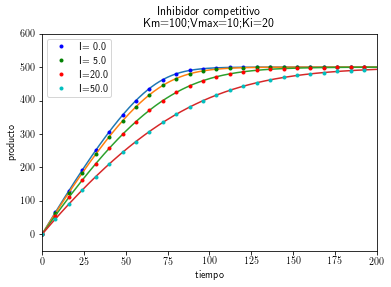

In [38]:
S0=500
Vmax=10
Km=100
Ki=20
t_window = 0, 200
p_window = 0, S0-1e-10
#simbolos=['b.','g.','r.','c.','m.','y.']
simbolos=['b.','g.','r.','c.']
allI=[0.0,5.0,20.0,50.0]
allKms=[Km*(1+i/Ki) for i in allI]
allTs=[]
allPs=[]
allSs=[]
for I,Km,sim in zip(allI,allKms,simbolos):
    ts = []
    ps = []
    for t in np.linspace(*t_window, num=500):
        try:
            # A more efficient technique would use the last-found-y-value as a 
            # starting point
            p = scipy.optimize.brentq(partial(z, t), *p_window)
        except ValueError:
            # Should we not be able to find a solution in this window.
            pass
        else:
            ts.append(t)
            ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    ss=S0-ps
    allTs.append(ts)
    allPs.append(ps)
    allSs.append(ss)
    pl.plot(ts, ps)
    pl.plot(ts[::20],ps[::20],sim, label="I=%4.1f"%(I))
    pl.xlim(*t_window)
    pl.ylim([-50,600])
    pl.xlabel("tiempo")
    pl.ylabel("producto")
    pl.title("Inhibidor competitivo\nKm=100;Vmax=10;Ki=20")
    pl.legend(loc=0)
pl.savefig("Inhib1.pdf", bbox_inches="tight")

Inhib por producto

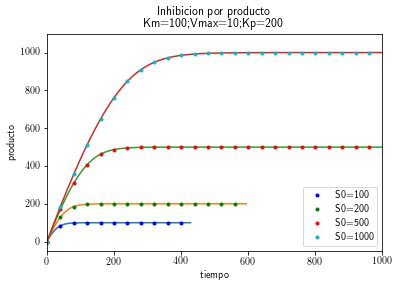

In [39]:
Vmax=10
Km=100
Kp=200
#simbolos=['b.','g.','r.','c.','m.','y.']
simbolos=['b.','g.','r.','c.']
allS0=[100,200,500,1000]
allKms=[Km*(Kp+i)/(Kp+Km) for i in allS0]
allVmax=[Vmax*Kp/(Kp+Km) for i in allS0]
allTs=[]
allPs=[]
allSs=[]
for Vmax,Km,S0,sim in zip(allVmax,allKms,allS0,simbolos):
    t_window = 0, 1000
    p_window = 0, S0-1e-10
    ts = []
    ps = []
    for t in np.linspace(*t_window, num=500):
        try:
            # A more efficient technique would use the last-found-y-value as a 
            # starting point
            p = scipy.optimize.brentq(partial(z, t), *p_window)
        except ValueError:
            # Should we not be able to find a solution in this window.
            pass
        else:
            ts.append(t)
            ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    ss=S0-ps
    allTs.append(ts)
    allPs.append(ps)
    allSs.append(ss)
    pl.plot(ts, ps)
    pl.plot(ts[::20],ps[::20],sim, label="S0=%i"%(S0))
    pl.xlim(*t_window)
    pl.ylim([-50,1100])
    pl.xlabel("tiempo")
    pl.ylabel("producto")
    pl.title("Inhibicion por producto\nKm=100;Vmax=10;Kp=200")
    pl.legend(loc=0)
pl.savefig("InhibProd.pdf", bbox_inches="tight")

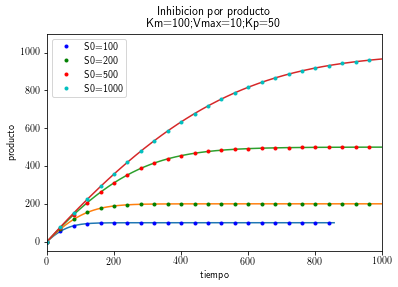

In [40]:
Vmax=10
Km=100
Kp=50
#simbolos=['b.','g.','r.','c.','m.','y.']
simbolos=['b.','g.','r.','c.']
allS0=[100,200,500,1000]
allKms=[Km*(Kp+i)/(Kp+Km) for i in allS0]
allVmax=[Vmax*Kp/(Kp+Km) for i in allS0]
allTs=[]
allPs=[]
allSs=[]
for Vmax,Km,S0,sim in zip(allVmax,allKms,allS0,simbolos):
    t_window = 0, 1000
    p_window = 0, S0-1e-10
    ts = []
    ps = []
    for t in np.linspace(*t_window, num=500):
        try:
            # A more efficient technique would use the last-found-y-value as a 
            # starting point
            p = scipy.optimize.brentq(partial(z, t), *p_window)
        except ValueError:
            # Should we not be able to find a solution in this window.
            pass
        else:
            ts.append(t)
            ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    ss=S0-ps
    allTs.append(ts)
    allPs.append(ps)
    allSs.append(ss)
    pl.plot(ts, ps)
    pl.plot(ts[::20],ps[::20],sim, label="S0=%i"%(S0))
    pl.xlim(*t_window)
    pl.ylim([-50,1100])
    pl.xlabel("tiempo")
    pl.ylabel("producto")
    pl.title("Inhibicion por producto\nKm=100;Vmax=10;Kp=50")
    pl.legend(loc=0)
pl.savefig("InhibProd2.pdf", bbox_inches="tight")